# Cálculo para transpor para o artigo
Beseado no arquivo draft2.ipynb

In [1]:
from sympy import *
from sympy.abc import s, t

In [2]:
init_session()

IPython console for SymPy 1.2 (Python 3.6.5-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



In [63]:
j = Symbol('\\left\\langle{j}\\right\\rangle')
z = Symbol('z',complex=True)
b = Symbol('beta',positive=True)
Pin, Pi = symbols('P_\\infty \\Pi',cls=Function)

In [62]:
def f(z,k):
    return 2**(k+1)/(b*z)*sinh(b*z/2**(k+1))

def PI(z,m,n):
    a = Symbol('beta',positive=True)
    aux = exp(-m*z)*Product((f(z,k))**(2**k), (k, 1, n)).doit()
    #aux = aux.rewrite(exp).expand()
    return aux

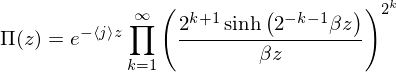

In [96]:
Eq(Pi(z),PI(z,j,oo))

Aplicando o $\ln$ para a transformada de Laplace

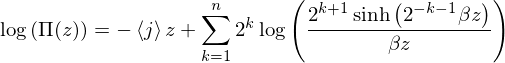

In [94]:
Eq(log(Pi(z)),-j*z+Sum((2**k)*log(f(z,k)),(k,1,n)))

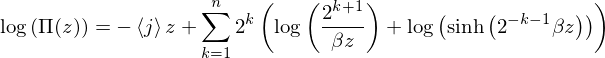

In [97]:
Eq(log(Pi(z)),-j*z+Sum((2**k)*(log(2**(k+1)/(b*z))+
                          log(sinh(b*z/(2**(k+1))))),(k,1,n)))

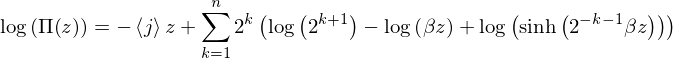

In [99]:
Eq(log(Pi(z)),-j*z+Sum((2**k)*(log(2**(k+1))-log(b*z)+
                          log(sinh(b*z/(2**(k+1))))),(k,1,n)))

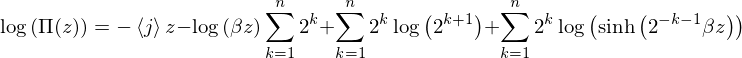

In [100]:
Eq(log(Pi(z)),-j*z+Sum((2**k)*log(2**(k+1)),(k,1,n))-
   log(b*z)*Sum(2**k,(k,1,n))+
   Sum((2**k)*log(sinh(b*z/(2**(k+1)))),(k,1,n))) 

## Calculando a primeira derivada

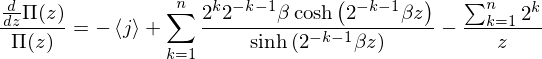

In [101]:
Eq(1/Pi(z)*diff(Pi(z),z),diff(-j*z+Sum((2**k)*log(2**(k+1)),(k,1,n))-
                              log(b*z)*Sum(2**k,(k,1,n))+
                              Sum((2**k)*log(sinh(b*z/(2**(k+1)))),(k,1,n)),z))

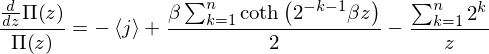

In [160]:
Eq(1/Pi(z)*diff(Pi(z),z),-j+b/2*Sum(coth(b*z/(2**(k+1))),(k,1,n))-
  Sum(2**k,(k,1,n))/z)

### Expandindo em série a parte real e imaginária

In [178]:
t1 = b/2*coth(b*z/(2**(k+1)))
t2 = -2**k/z

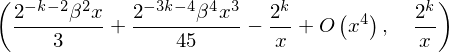

In [179]:
im(t1).subs([[im(z),x],[re(z),0]]).series(x,0,4),im(t2).subs([[im(z),x],[re(z),0]])

Claramente vemos que a parte imaginária é nula quando $x=\Im(z)$ tende a zero, já a parte real pode ser expandida

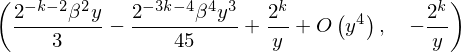

In [186]:
re(t1).subs([[re(z),y],[im(z),0]]).series(y,0,4),re(t2).subs([[re(z),y],[im(z),0]])

Vemos aqui também que quando $y=\Re(z)$ tende a zero, os termos também são nulos

## Segunda derivada

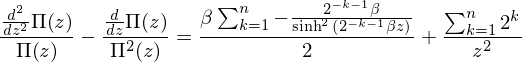

In [187]:
Eq(-1/Pi(z)**2*diff(Pi(z),z)+1/Pi(z)*diff(Pi(z),z,2),
  diff(-j+b/2*Sum(coth(b*z/(2**(k+1))),(k,1,n))-
  Sum(2**k,(k,1,n))/z,z))

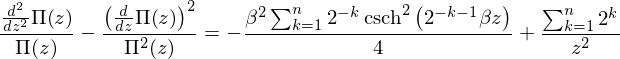

In [211]:
Eq(-1/Pi(z)**2*diff(Pi(z),z)**2+1/Pi(z)*diff(Pi(z),z,2),
  -b**2/2**2*Sum(csch(b*z/2**(k+1))**2/(2**k),(k,1,n))
  +Sum(2**k,(k,1,n))/z**2)

In [209]:
t1 = -b**2/4*csch(b*z/2**(k+1))**2/(2**k)
t2 = 2**k/z**2

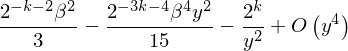

In [210]:
re(t1).subs([[im(z),0],[re(z),y]]).series(y,0,4)

In [208]:
re(t2).subs([[im(z),0],[re(z),y]])